# BTA 1016 MODULE 10 EXPLORE A NEW DATASET (KAGGLE)
# DAVID TOLUWALOPE
# A00240777

## Import Python Libraries

In [152]:
#Import Python Libraries
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Reading csv file for analysis 

In [153]:
#Reading csv file for analysis 
#air quality index data for all country from July 21st(07/21/22) - August 10th(08/10/22)
air_quality = pd.read_csv("air_quality.csv")

In [154]:
#printing air quality data(just the first 10 few rows using ".head() method")
air_quality.head(10)

Date     Country                          Status  AQI Value
0  7/21/2022     Albania                            Good         14
1  7/21/2022     Algeria                        Moderate         65
2  7/21/2022     Andorra                        Moderate         55
3  7/21/2022      Angola  Unhealthy for Sensitive Groups        113
4  7/21/2022   Argentina                        Moderate         63
5  7/21/2022     Armenia                        Moderate         76
6  7/21/2022   Australia                        Moderate         56
7  7/21/2022     Austria                            Good         45
8  7/21/2022  Azerbaijan                            Good         12
9  7/21/2022     Bahrain                       Unhealthy        165

In [155]:
#Checking all data types for accuracy to allow for proper analysis
# As we can see the date colmn is of type object and we have to convert it to datetime format.
air_quality.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3668 entries, 0 to 3667
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Date       3668 non-null   object
 1   Country    3668 non-null   object
 2   Status     3668 non-null   object
 3   AQI Value  3668 non-null   int64 
dtypes: int64(1), object(3)
memory usage: 114.8+ KB


In [156]:
# we can use astype function
air_quality['Date'] = air_quality['Date'].astype('datetime64[ns]')
air_quality.info() #checking the new data types


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3668 entries, 0 to 3667
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       3668 non-null   datetime64[ns]
 1   Country    3668 non-null   object        
 2   Status     3668 non-null   object        
 3   AQI Value  3668 non-null   int64         
dtypes: datetime64[ns](1), int64(1), object(2)
memory usage: 114.8+ KB


## Number of days data was collected

In [157]:
#Time_difference from 07/21/22 - 08/10/22

date1=air_quality["Date"].min()
date2=air_quality["Date"].max()

In [158]:
date2 - date1

Timedelta('20 days 00:00:00')

Data was collected for 20 days.

In [159]:
#How many countries was the data collected for. #Using the unique method becuase most countries were repeated multiple times.
len(air_quality['Country'].unique())
#142 countries

142

## Data Summary statistics

In [160]:
air_quality.describe()

AQI Value
count  3668.000000
mean     60.928299
std      43.904289
min       1.000000
25%      29.000000
50%      53.000000
75%      82.000000
max     407.000000

## Info on the countries with the minimum and maximum value 

In [161]:
#The countries with the minimum air quality index value is . 
#From the summary statistics,it says the min value is 1
air_quality2= air_quality[air_quality["AQI Value"]== 1]
air_quality2

Date         Country Status  AQI Value
53   2022-07-21            Guam   Good          1
195  2022-07-21            Guam   Good          1
478  2022-07-22            Guam   Good          1
619  2022-07-22            Guam   Good          1
731  2022-07-23  Cayman Islands   Good          1
760  2022-07-23            Guam   Good          1
901  2022-07-23            Guam   Good          1
1042 2022-07-24            Guam   Good          1
1183 2022-07-25            Guam   Good          1
1295 2022-07-26  Cayman Islands   Good          1
1324 2022-07-26            Guam   Good          1
1436 2022-07-26  Cayman Islands   Good          1
1606 2022-07-27            Guam   Good          1
1747 2022-07-28            Guam   Good          1
1859 2022-07-29  Cayman Islands   Good          1
1888 2022-07-29            Guam   Good          1
2000 2022-07-30  Cayman Islands   Good          1
2029 2022-07-30            Guam   Good          1
2170 2022-07-31            Guam   Good          1
2452 2022-08-02            Guam   Good          1
2734 2022-08-04            Guam   Good          1
2960 2022-08-05       Venezuela   Good          1
3128 2022-08-07  Cayman Islands   Good          1
3155 2022-08-07         Grenada   Good          1
3290 2022-08-08          Gambia   Good          1
3439 2022-08-09            Guam   Good          1
3580 2022-08-10            Guam   Good          1

In [162]:
#There seems to be a multiple countries for different days
#so this shows unique country items.
air_quality2['Country'].unique()

array(['Guam', 'Cayman Islands', 'Venezuela', 'Grenada', 'Gambia'],
      dtype=object)

In [163]:
print("There are "+ str(len(air_quality2['Country'].unique())) + " countries with the minimum AQI values")

There are 5 countries with the minimum AQI values


In [164]:
#The countries with the maximum air quality index value is . 
#From the summary statistics,it says the min value is 407
air_quality3= air_quality[air_quality["AQI Value"]== 407]
air_quality3

Date Country     Status  AQI Value
3600 2022-08-10  Kuwait  Hazardous        407

Just one country has the max AQI value for these 20 days and it was Kuwait.

## Boxplot for the air quality index values 

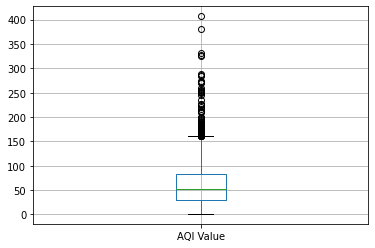

In [165]:
air_quality.boxplot(column='AQI Value')
plt.show()
#A lot of outliers
#Right skewwed

## Histogram for the air quality index values 

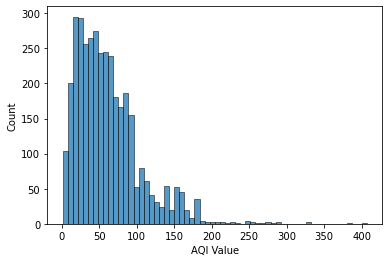

In [166]:
#Use seaborn package to draw a histogram
sns.histplot(air_quality['AQI Value']);

C:\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


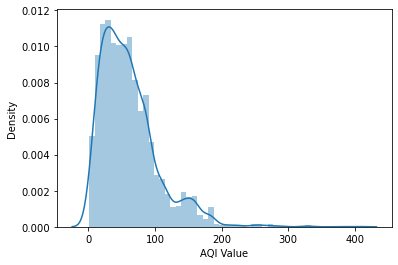

In [167]:
sns.distplot(air_quality['AQI Value']); #fill method to see skew outline 

This confirms the right-skewwed analysis of the boxplot.
Most of the observations for the AQI lies to the right of the graph which makes it a positively skewed histogram or a right-skewed histogram. The tail of the graph has lower frequencies/observations.
One can say most countries have a good- moderate AQI value.

## Barplot of  AQI Count by Status

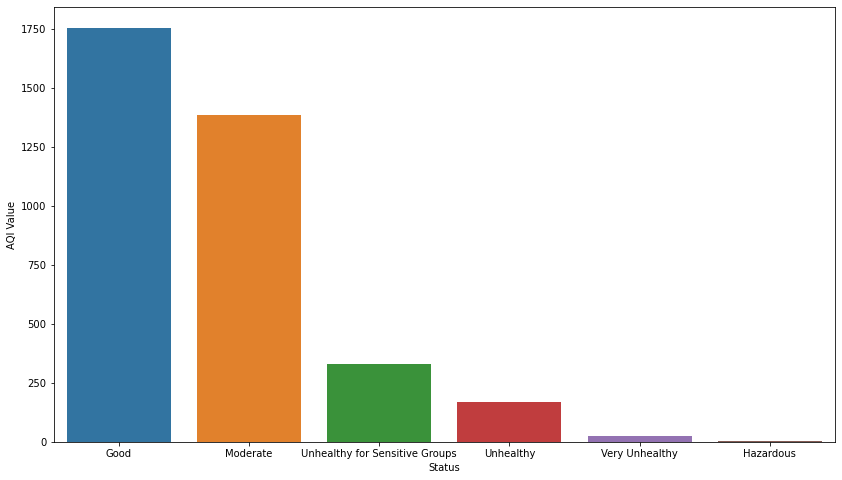

In [168]:
plt.figure(figsize = (14,8))

ax = sns.barplot(x='Status',y ='AQI Value', data=air_quality, estimator=len)

More countries were on the "Good" status. 
The "Moderate" status also had more countries compared to the "Hazardous" status group with the least number of countries.

## Countries with Hazardous status

In [169]:
# Countries with Hazardous status
air_quality4=air_quality[air_quality['Status'] == "Hazardous"]
air_quality4

Date               Country     Status  AQI Value
892  2022-07-23                 Gabon  Hazardous        331
1545 2022-07-26  United Arab Emirates  Hazardous        327
2016 2022-07-30              Ethiopia  Hazardous        326
3304 2022-08-08                 India  Hazardous        380
3600 2022-08-10                Kuwait  Hazardous        407

In [171]:
air_quality4["Country"]

892                    Gabon
1545    United Arab Emirates
2016                Ethiopia
3304                   India
3600                  Kuwait
Name: Country, dtype: object

There are five countries on the Hazardous status level. These countries are Gabon,United Arab Emirates,Ethiopia,India and Kuwait